In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### For this guided example, we will be using the epicurious dataset to see if we can use the ingredient and keyword list to predict the rating.  This would be something very helpful for a person writing a cookbook as it could help them chose which recipes to include based on what is more likely to be enjoyed.  This would result in the book more likely to be successful.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

#### From the analysis, we learn a few things.
* From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71.  This is interesting because the 25th percentile is actually above the mean.  The likely culprit - there is likely some kind of outlier population.  The outlier makes sense when you think about reviews - some bad recipes may have few very low reviews.

#### Let's validate that idea further with a histogram

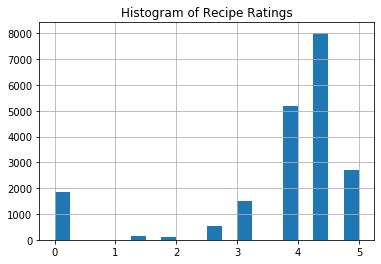

In [4]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

####  A few things are shown in this histogram
* There are sharp discontinutities
* There is no continuous data (no receipe has a 3.5 rating, for example)
* We also see the anticipated increase at 0

#### We will try a naive approach again, but this time using a Suppport Vector Maching (SVM) Regressor.  First, let's do some data cleaning.

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

#### It is apparent immediately that nutirion information is not available for all goods.  This would be interesting, but for this exercise, let's forcus on ingredients and keywords.  Let's dop the whole columns for calories, proteins, fat, and sodium.  We will come back to nutrition information later.

In [6]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

#### What would a scatter plot look like, comparing actuals to predicted?

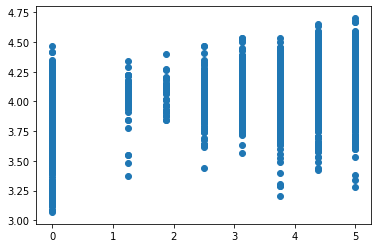

In [7]:
plt.scatter(Y, svr.predict(X))

####  It's a pretty useless visualization.  It's becaues of the discontinous nature of the outcome variable.  There is too much data to really see what's going on here.  

In [8]:
svr.score(X, Y)

-0.003978314483867873

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

#### Well, that didn't really work...

#### There are many things that could be done here.
* The overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.
* We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.
* We could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

### Welcome to the challenge!

#### Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [10]:
#Let's make a copy of this dataframe for the purposes of our challenge
raw_data_copy = raw_data.copy()

In [11]:
list(raw_data_copy.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [12]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [13]:
categorical_features = (raw_data_copy.select_dtypes(include=['object']).columns.values)
categorical_features

array(['title'], dtype=object)

In [14]:
numerical_features = raw_data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'alabama',
       'alaska', 'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise',
       'anniversary', 'anthony bourdain', 'aperitif', 'appetizer',
       'apple', 'apple juice', 'apricot', 'arizona', 'artichoke',
       'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta',
       'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon',
       'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day',
       'bean', 'beef', 'beef rib', 'beef shank', 'beef tenderloin',
       'beer', 'beet', 'bell pepper', 'berry', 'beverly hills',
       'birthday', 'biscuit', 'bitters', 'blackberry', 'blender',
       'blue cheese', 'blueberry', 'boil', 'bok choy', 'bon appétit',
       'bon app��tit', 'boston', 'bourbon', 'braise', 'bran', 'brandy',
       'bread', 'breadcrumbs', 'breakfast', 'br

In [15]:
raw_data_copy.shape

(20052, 680)

In [16]:
#Let's make a classifier.  In order to do this, we will create a new binary output variable based on rating row values 
#being greater than or less than the median.
raw_data_copy['y_predictor'] = np.where(raw_data_copy['rating'] > raw_data_copy['rating'].median(),1,0)

In [17]:
#Did it work?  Let's check to see if values were applied
raw_data_copy['y_predictor'].value_counts()

0    17333
1     2719
Name: y_predictor, dtype: int64

In [18]:
raw_data_copy

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,y_predictor
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
#There is a lot of data.  Can we do something to reduce the amount of rows even further?  
update = raw_data_copy.dropna()

In [20]:
update.shape

(15864, 681)

In [21]:
# Count nulls 
null_count_update = update.isnull().sum()
null_count_update[null_count_update>0]

Series([], dtype: int64)

In [22]:
#recreate my y_predictor
update['y_predictor_new'] = np.where(update['rating'] > update['rating'].median(),1,0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#Run the model using Support Vector Regression (SVR)
from sklearn.svm import SVR
svr = SVR()
X = update.drop(['title'], 1).sample(frac=0.8, replace=True, random_state=1)
y_predictor_new = update.rating.sample(frac=0.8, replace=True, random_state=1)
svr.fit(X,y_predictor_new)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
svr.score(X, y_predictor_new)

0.6165952396034894

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, y_predictor_new, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

array([0.43799664, 0.40941824, 0.37805152, 0.41245971, 0.42348244])

In [27]:
#The model looks a lot better now that we created the classifiers.  What happens when we use Support Vector Classifier (SVC)
#and increase the amount of data we bring in for the model?  We can increase the amount of data by changing
#frac=0.3 to frac=0.8.  The more data we can look at, the more informative the model becomes.
from sklearn.svm import SVC
svc = SVC()
X = update.drop(['title'], 1).sample(frac=0.8, replace=True, random_state=1)
Y = update.y_predictor_new.sample(frac=0.8, replace=True, random_state=1)
svc.fit(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
svc.score(X, Y)

0.907257111338744

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

array([0.32222522, 0.3426174 , 0.32025525, 0.36339308, 0.31831375])

#### This is interesting.  The SVC score was pretty high which is nice.  But the cross value score is actually lower than what the model showed when we ran a SVR.  In any case, changing the features to binary has helped us get more of a correlation and help to paint a better picture of the model than when we first started.